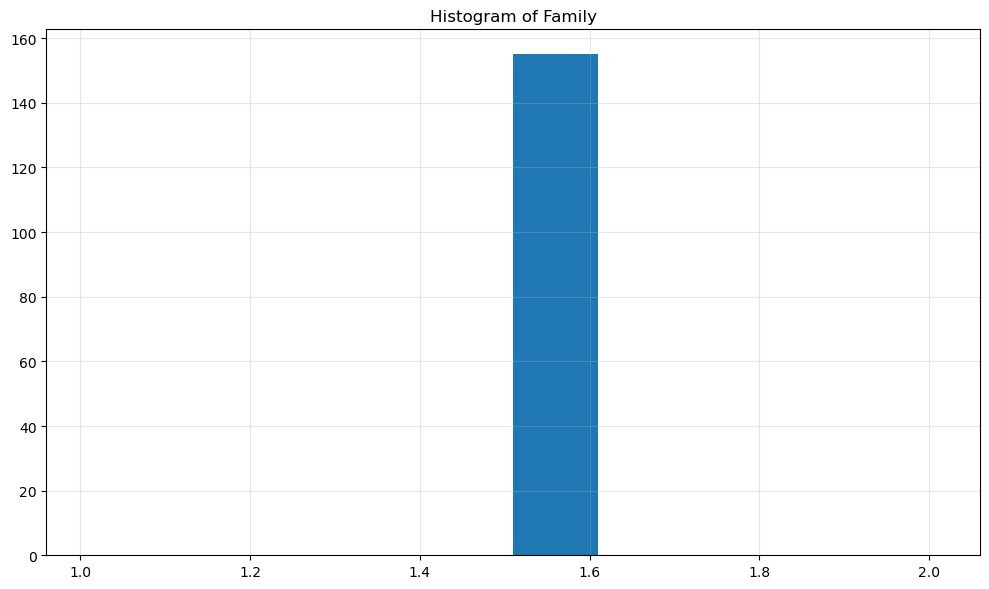

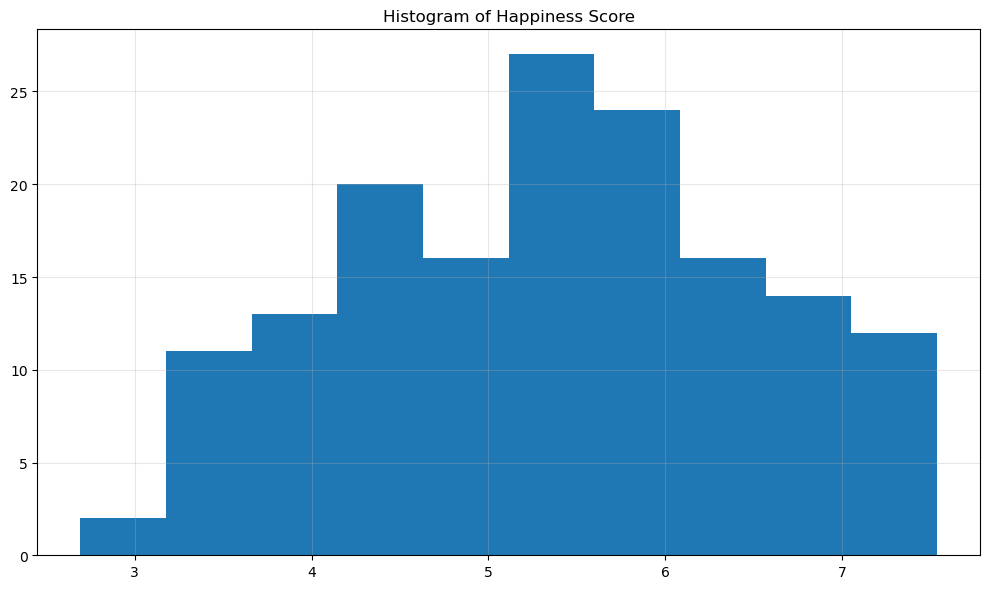

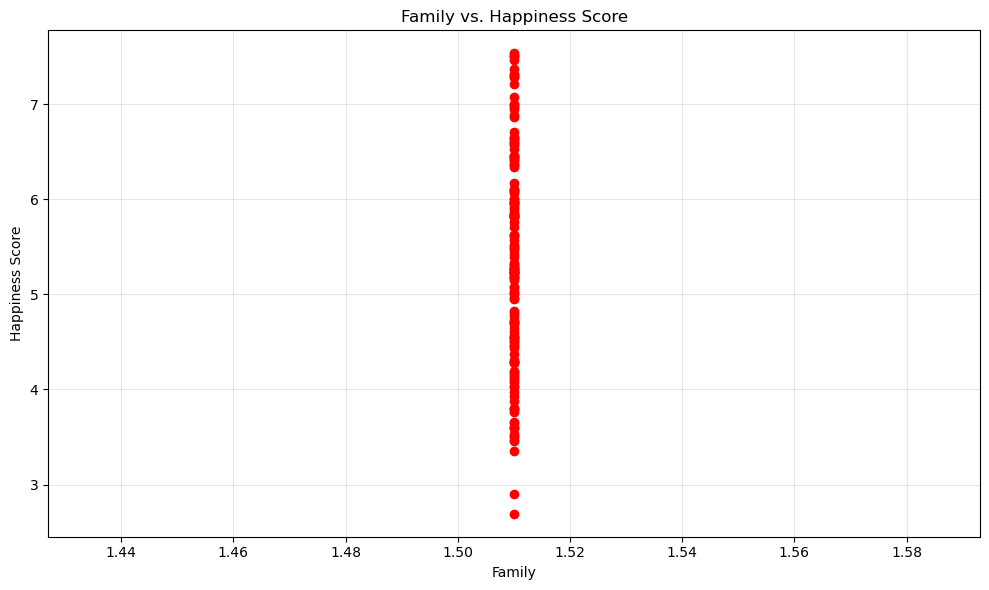

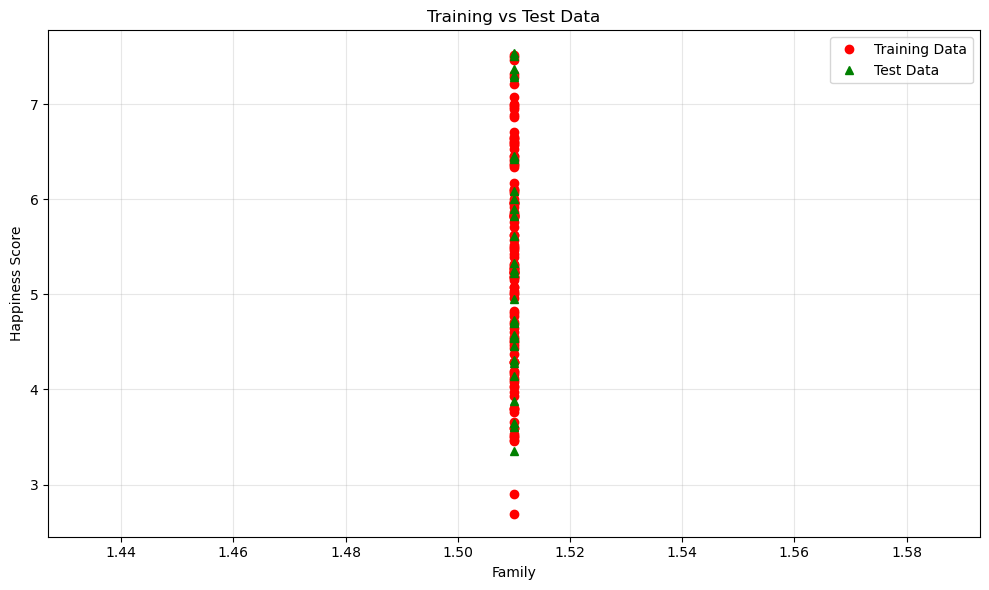

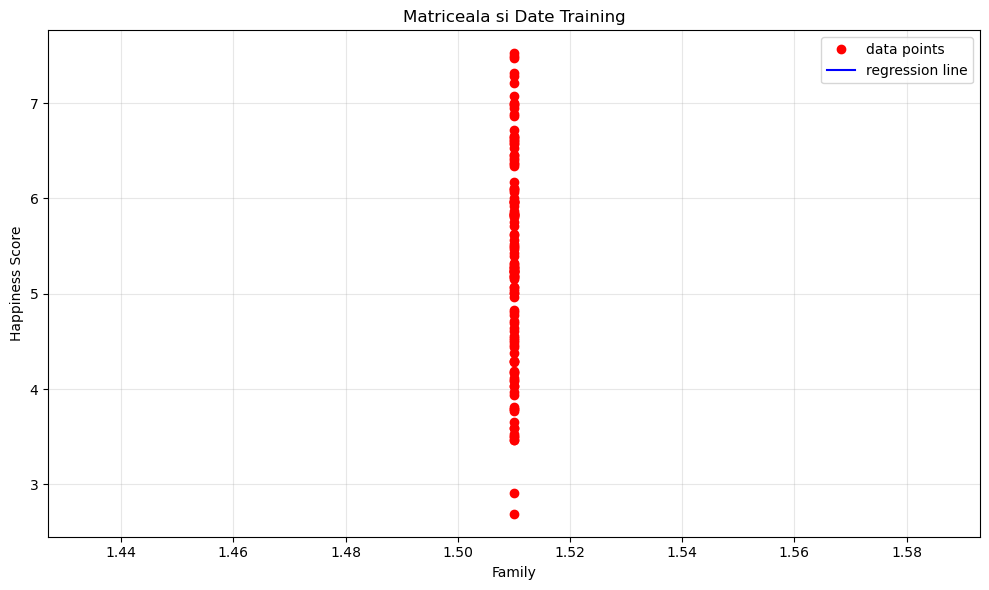

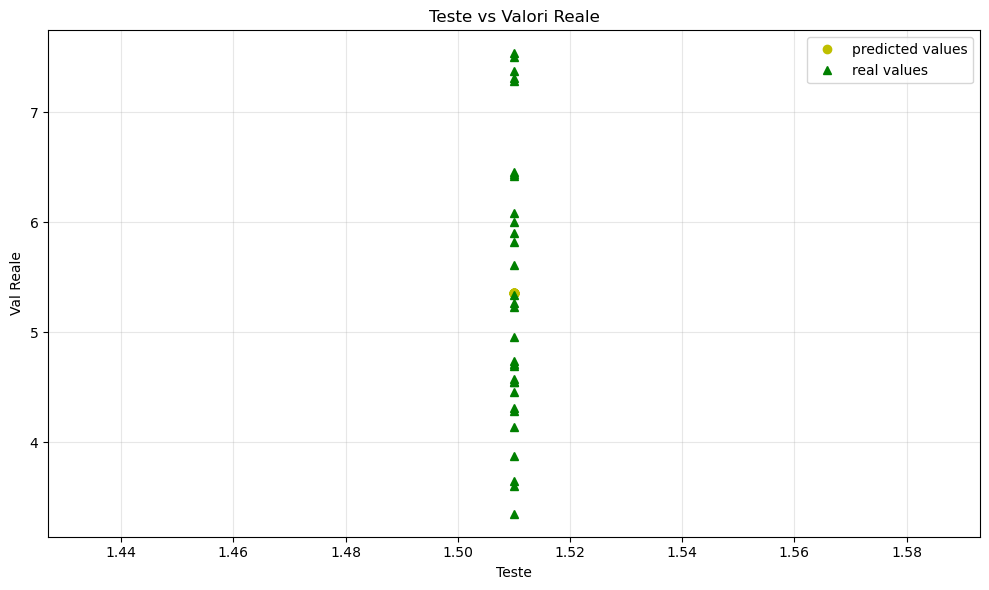

MSE: 1.488970


In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

"""
    A*w=b => w = A^(−1)*b
    A^(−1) = 1 / det(A) * [[d −b] [-c a]]
"""
def det_2x2(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def inv_matrix_2x2(matrix):
    det = det_2x2(matrix)
    if abs(det) < 1e-10:
        lambda_reg = 0.01
        matrix[0][0] += lambda_reg
        matrix[1][1] += lambda_reg
        det = det_2x2(matrix)

    inv = [[matrix[1][1] / det, -matrix[0][1] / det],
           [-matrix[1][0] / det, matrix[0][0] / det]]
    return inv, det

def matrix_vector_mul(matrix, vector):
    result = [0, 0]
    for i in range(2):
        for j in range(2):
            result[i] += matrix[i][j] * vector[j]
    return result


class MyLinearRegression:
    def __init__(self):
        self.w0 = 0
        self.w1 = 0

    def fit(self, training_i, training_o):
        n = len(training_i)
        sum_x = sum(training_i) # ∑xi
        sum_y = sum(training_o) # ∑yi
        sum_xy = sum(training_i[i] * training_o[i] for i in range(n)) # ∑xi * yi
        sum_x_squared = sum(training_i[i] ** 2 for i in range(n)) # ∑xi ^ 2
        a = [[n, sum_x], [sum_x, sum_x_squared]]
        b = [sum_y, sum_xy]
        a_inv, _ = inv_matrix_2x2(a)
        w = matrix_vector_mul(a_inv, b)
        self.w0, self.w1 = w[0], w[1]
        return self.w0, self.w1

    def predict(self, input_list):
        return [self.w0 + self.w1 * x for x in input_list]



def load_data(file_name, input_var, output_var):
    data = []
    header = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
            else:
                data.append(row)
            line_count += 1

    selected = header.index(input_var)
    inputs = [float(data[i][selected]) if data[i][selected] != '' else None for i in range(len(data))]

    selected_o = header.index(output_var)
    outputs = [float(data[i][selected_o]) if data[i][selected_o] != '' else None for i in range(len(data))]

    valid_inputs = [x for x in inputs if x is not None]
    valid_outputs = [x for x in outputs if x is not None]

    input_mean = sum(valid_inputs) / len(valid_inputs)
    output_mean = sum(valid_outputs) / len(valid_outputs)

    inputs = [input_mean if x is None else x for x in inputs]
    outputs = [output_mean if x is None else x for x in outputs]

    return inputs, outputs


def plot_histogram(x, var):
    plt.figure(figsize=(10, 6))
    plt.hist(x, 10)
    plt.title('Histogram of ' + var)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def check_linearity(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'ro')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



file = 'data/v1_world-happiness-report-2017.csv'
inputs_rez, outputs_rez = load_data(file, 'Family', 'Happiness.Score')

plot_histogram(inputs_rez, 'Family')
plot_histogram(outputs_rez, 'Happiness Score')

check_linearity(inputs_rez, outputs_rez, 'Family', 'Happiness Score', 'Family vs. Happiness Score')

np.random.seed(5)
indexes = [i for i in range(len(inputs_rez))]
training_sample = np.random.choice(indexes, int(0.8 * len(inputs_rez)), replace=False)
test_sample = [i for i in indexes if i not in training_sample]

training_inputs = [inputs_rez[i] for i in training_sample]
training_outputs = [outputs_rez[i] for i in training_sample]

test_inputs = [inputs_rez[i] for i in test_sample]
test_outputs = [outputs_rez[i] for i in test_sample]

plt.figure(figsize=(10, 6))
plt.plot(training_inputs, training_outputs, 'ro', label='Training Data')
plt.plot(test_inputs, test_outputs, 'g^', label='Test Data')
plt.title('Training vs Test Data')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

model  = MyLinearRegression()
w0, w1 = model.fit(training_inputs, training_outputs)

no_of_points = 1000
x_ref = []
val = min(training_inputs)
step = (max(training_inputs) - min(training_inputs)) / no_of_points
for i in range(1, no_of_points):
    x_ref.append(val)
    val += step
y_ref = [w0 + w1 * el for el in x_ref]

plt.figure(figsize=(10, 6))
plt.plot(training_inputs, training_outputs, 'ro', label='data points')
plt.plot(x_ref, y_ref, 'b-', label='regression line')
plt.title("Matriceala si Date Training")
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

test_predict = model.predict(test_inputs)

plt.figure(figsize=(10, 6))
plt.plot(test_inputs, test_predict, 'yo', label='predicted values')
plt.plot(test_inputs, test_outputs, 'g^', label='real values')
plt.title("Teste vs Valori Reale")
plt.xlabel("Teste")
plt.ylabel("Val Reale")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

mse = sum((a - p) ** 2 for a, p in zip(test_outputs, test_predict)) / len(test_outputs)
print(f"MSE: {mse:.6f}")
